In [1]:
# from table_detection import *
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2
import copy

In [58]:
# PARAMETERS
path = 'img/'
proc_path = 'proc_img/'
sp_path = 'sp_img/'
filename = 'image02.png'
sp_filename = filename.split('.')
proc_filename = sp_filename[0] + '_proc.' + sp_filename[1]
plt.style.use('dark_background')

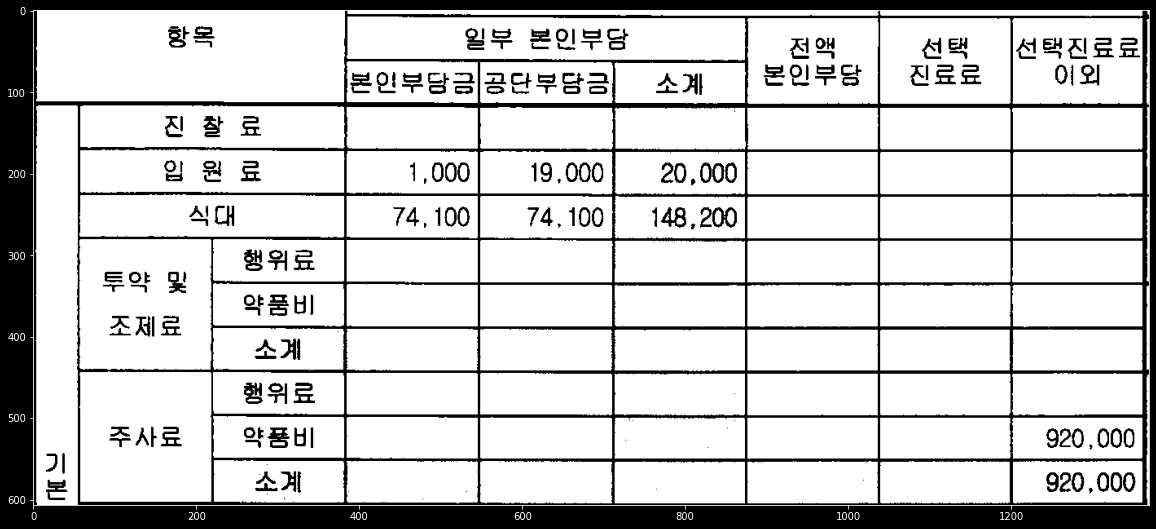

In [3]:
img = cv2.imread(path+filename, cv2.IMREAD_GRAYSCALE)
img_dim = img.shape

# 이진화
bi_thr = 200
ret, bi_img = cv2.threshold(img, bi_thr, 255, cv2.THRESH_BINARY)
cv2.imwrite(proc_path+proc_filename, bi_img)
plt.figure(figsize=[20, 10])
plt.imshow(bi_img, cmap='gray')
plt.show()

In [4]:
bi_img.shape

(607, 1370)

In [50]:
row_mean = list()
row_max = list()
row_min = list()
row_idx = [i for i in range(bi_img.shape[0])]
for row_id in row_idx:
    row = bi_img[row_id, :]
    row_mean.append(np.mean(row))
    row_max.append(np.max(row))
    row_min.append(np.min(row))
    

col_mean = list()
col_idx = [i for i in range(bi_img.shape[1])]
for col_id in col_idx:
    col = bi_img[:, col_id]
    col_mean.append(np.mean(col))

* line_id 구하기

In [51]:
min_thr = 0
max_thr = 180
line_row_idx = list()
for idx, value in enumerate(row_mean):
    if min_thr <= value < max_thr:
        line_row_idx.append(idx)
    else:
        pass

line_col_idx = list()
for idx, value in enumerate(col_mean):
    if min_thr <= value < max_thr:
        line_col_idx.append(idx)
    else:
        pass

* 경계선 구하기

In [52]:
text_row_diff = list()
for n, row_id in enumerate(text_row_idx):
    if n == len(text_row_idx) - 1:
        text_row_diff.append(0)
    else:
        diff = text_row_idx[n+1] - text_row_idx[n]
        text_row_diff.append(diff)
text_row_idx_diff = dict(zip(text_row_idx, text_row_diff))

In [53]:
line_col_diff = list()
for n, col_id in enumerate(line_col_idx):
    if n == len(line_col_idx) - 1:
        line_col_diff.append(0)
    else:
        diff = line_col_idx[n+1] - line_col_idx[n]
        diff = line_col_diff.append(diff)
line_col_idx_diff = dict(zip(line_col_idx, line_col_diff))

---

* row 범위 구하기

row 0, 9: 62


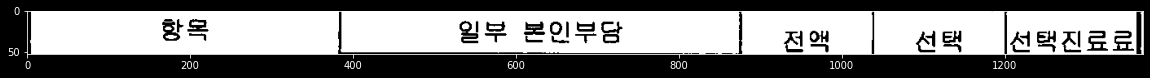

row 1, 62: 119


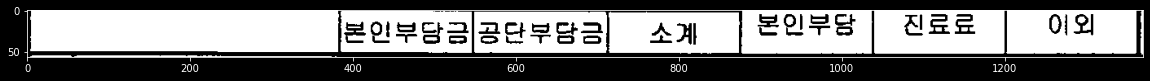

row 2, 119: 173


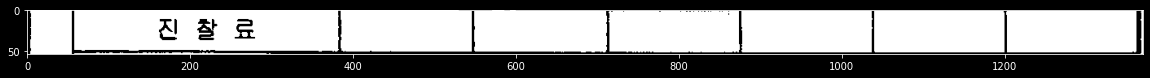

row 3, 173: 228


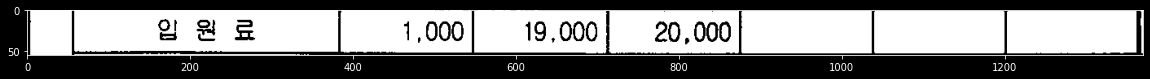

row 4, 228: 282


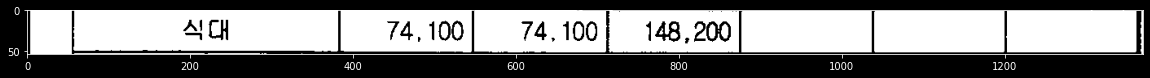

row 5, 282: 336


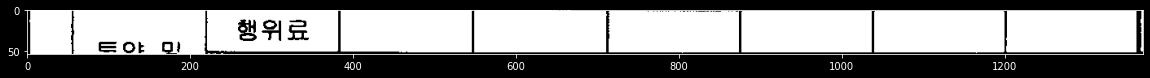

row 6, 336: 391


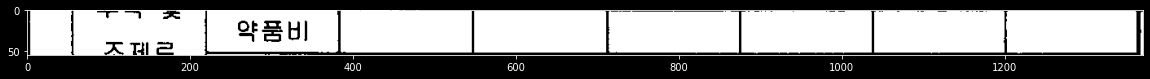

row 7, 391: 445


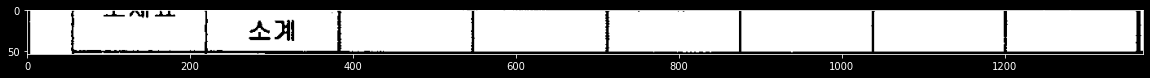

row 8, 445: 499


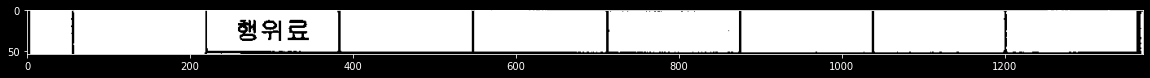

row 9, 499: 553


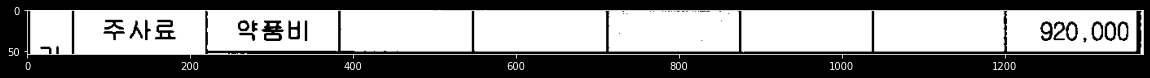

row 10, 553: -1


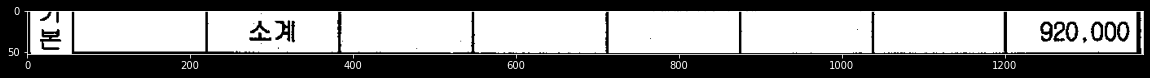

In [54]:
splitter = [i for i, v in text_row_idx_diff.items() if v >= 50]
for n, sp_id in enumerate(splitter):
    if n == len(splitter) - 1:
        sub_img = bi_img[splitter[n]: -1]
        plt.figure(figsize=(20, 10))
        print(f'row {n}, {splitter[n]}: {-1}')
        plt.imshow(sub_img, cmap='gray')
        plt.show()
    else:
        sub_img = bi_img[splitter[n]: splitter[n+1]]
        plt.figure(figsize=(20, 10))
        print(f'row {n}, {splitter[n]}: {splitter[n+1]}')
        plt.imshow(sub_img, cmap='gray')
        plt.show()

col 0, 3: 57


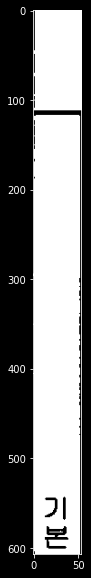

col 1, 57: 220


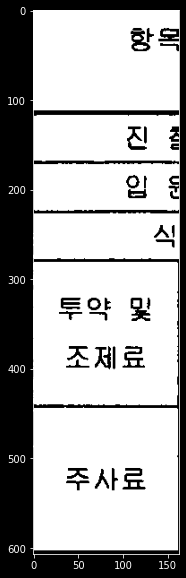

col 2, 220: 385


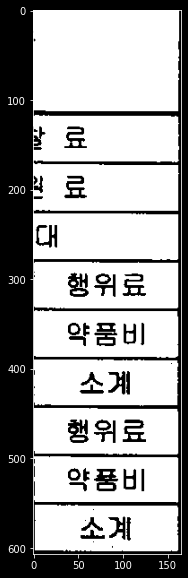

col 3, 385: 548


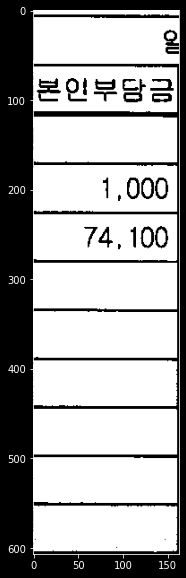

col 4, 548: 714


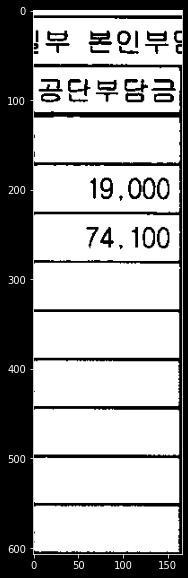

col 5, 714: 876


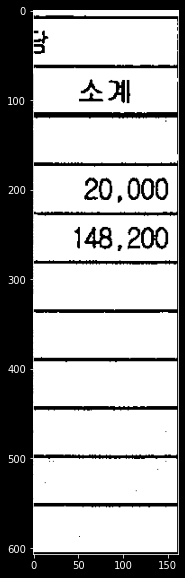

col 6, 876: 1039


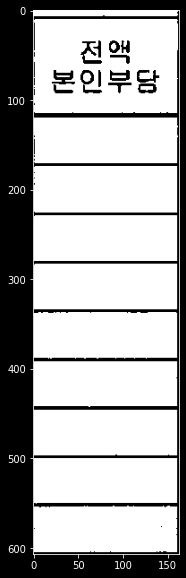

col 7, 1039: 1202


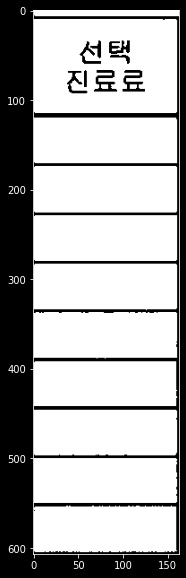

col 8, 1202: -1


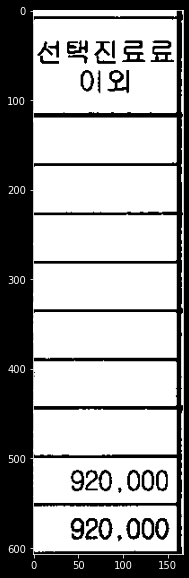

In [56]:
splitter = [i for i, v in line_col_idx_diff.items() if v >= 50]
for n, sp_id in enumerate(splitter):
    if n == len(splitter) - 1:
        sub_img = bi_img[:, splitter[n]: -1]
        plt.figure(figsize=(20, 10))
        print(f'col {n}, {splitter[n]}: {-1}')
        plt.imshow(sub_img, cmap='gray')
        plt.show()
    else:
        sub_img = bi_img[:, splitter[n]: splitter[n+1]]
        plt.figure(figsize=(20, 10))
        print(f'col {n}, {splitter[n]}: {splitter[n+1]}')
        plt.imshow(sub_img, cmap='gray')
        plt.show()

---

* row, col 따로 구해서 저장

In [46]:
line_row_idx_diff = text_row_idx_diff

In [62]:
row_line_sp = [i for i, v in line_row_idx_diff.items() if v >= 50]
col_line_sp = [i for i, v in line_col_idx_diff.items() if v >= 50]

for row_num, row_line_id in enumerate(row_line_sp):
    if row_num == len(row_line_sp) - 1:
        sub_row_img = bi_img[row_line_sp[row_num]: -1]
    else:
        sub_row_img = bi_img[row_line_sp[row_num]: row_line_sp[row_num+1]]
        
    for col_num, col_line_id in enumerate(col_line_sp):
        if col_num == len(col_line_sp) - 1:
            sub_cell_img = sub_row_img[:, col_line_sp[col_num]: -1]
        else:
            sub_cell_img = sub_row_img[:, col_line_sp[col_num]: col_line_sp[col_num+1]]
            
        sp_filename = f'{filename}_{row_num}_{col_num}.png'
        cv2.imwrite(sp_path+sp_filename, sub_cell_img)

---

* subplot 으로 출력

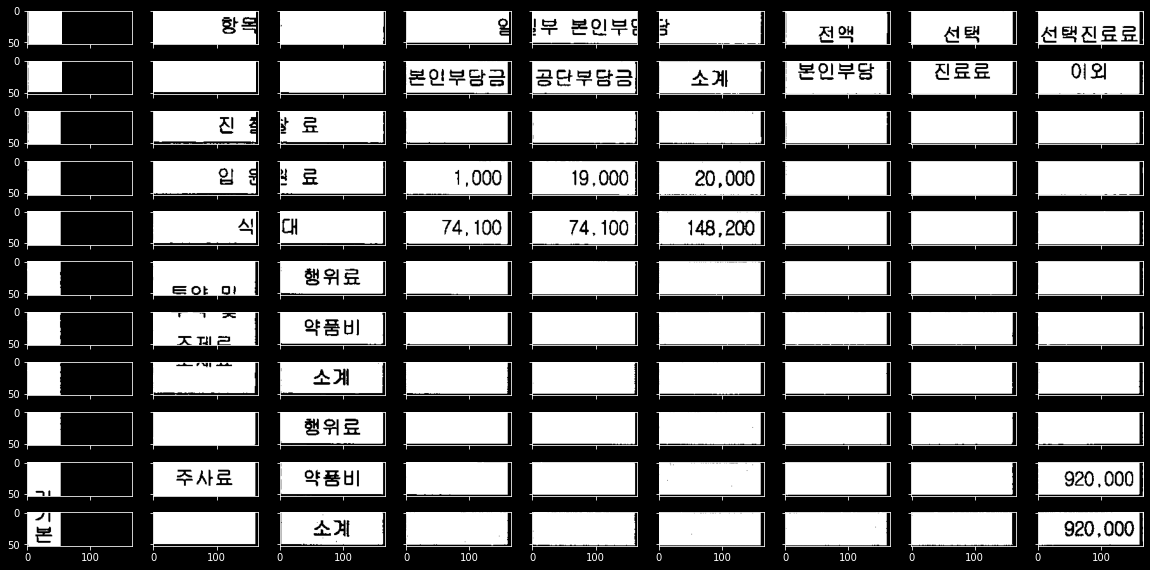

In [70]:
n_row = len(row_line_sp)
n_col = len(col_line_sp)
fig, ax = plt.subplots(n_row, n_col, sharex=True, sharey=True, figsize=(20, 10))
for row_num in range(n_row):
    for col_num in range(n_col):
        sp_filename = filename + '_' + str(row_num) + '_' + str(col_num) + '.png'
        img = cv2.imread(sp_path+sp_filename, cv2.IMREAD_GRAYSCALE)
        ax[row_num, col_num].imshow(img, cmap='gray')
# plt.tight_layout()